# **Museum visitors prediction model**

In [1]:
import utils
import pandas as pd

### Fetching & cleaning museum data

In [2]:
museum_df = utils.select_table_from_html('https://en.wikipedia.org/wiki/List_of_most-visited_museums')
second_column = 'Visitors in 2023 and 2022'
museum_df = museum_df.dropna(subset=[second_column])
museum_df[second_column] = museum_df[second_column].apply(utils.remove_square_brackets)
museum_df[second_column] = museum_df[second_column].apply(utils.remove_parentheses)
museum_df[second_column] = museum_df[second_column].apply(utils.convert_million)
museum_df[second_column] = museum_df[second_column].apply(utils.convert_to_float)
museum_df[['City', 'Country']] = museum_df['Location'].str.rsplit(',', n=1,expand=True)
museum_df['City'] = museum_df['City'].str.split(',').str[0]
museum_df.drop('Location', axis=1, inplace=True)
museum_df['Country'] = museum_df['Country'].fillna(museum_df['City'])
museum_df['Country'] = museum_df['Country'].str.strip()
museum_df['City'] = museum_df['City'].str.strip()
museum_df.columns = museum_df.columns.str.strip()
museum_df.columns = museum_df.columns.str.lower()
museum_df.head(25)

,name,visitors in 2023 and 2022,city,country
0,Louvre,8900000.0,Paris,France
1,Musée d'Orsay,5200000.0,Paris,France
2,National Museum of Natural History,4400000.0,Washington,United States
3,National Museum of Korea,4179999.0,Seoul,South Korea
4,Musée National d'Histoire Naturelle,3800000.0,Paris,France
5,Prado Museum,3209285.0,Madrid,Spain
6,Guggenheim Museum Bilbao,1324000.0,Bilbao,Spain
7,Vatican Museums,5080866.0,Vatican City,Vatican City
8,Natural History Museum,4654608.0,London,United Kingdom
9,British Museum,4097253.0,London,United Kingdom


### Fetching & cleaning population data

In [3]:
population_df = pd.read_csv('worldcities.csv')
population_df = population_df[['city', 'country', 'population']]
population_df.loc[population_df['country'] == 'Hong Kong', 'city'] = population_df.loc[population_df['country'] == 'Hong Kong', 'country']
population_df['city'] = population_df['city'].replace('Manhattan', 'New York City')
population_df['city'] = population_df['city'].replace('Queens', 'New York City')
population_df['city'] = population_df['city'].replace('Brooklyn', 'New York City')
population_df['city'] = population_df['city'].replace('Staten Island', 'New York City')
population_df['city'] = population_df['city'].replace('Bronx', 'New York City')
population_df['country'] = population_df['country'].replace('Hong Kong', 'China')
population_df = population_df.groupby(['city', 'country'], as_index=False)['population'].sum()
population_df.head(25)

,city,country,population
0,A Coruña,Spain,245468.0
1,A Yun Pa,Vietnam,53720.0
2,Aabenraa,Denmark,16401.0
3,Aachen,Germany,249070.0
4,Aadorf,Switzerland,9036.0
5,Aalborg,Denmark,143598.0
6,Aalen,Germany,68361.0
7,Aaley,Lebanon,130000.0
8,Aalsmeer,Netherlands,31991.0
9,Aalst,Belgium,88854.0


### Joining dataframes


In [4]:
merged_df = pd.merge(museum_df, population_df, on=['city', 'country'], how='left')
merged_df['population'] = merged_df['population'].astype(float)
merged_df.to_csv('visitors_population.csv', index=False)
merged_df.head(50)

,name,visitors in 2023 and 2022,city,country,population
0,Louvre,8900000.0,Paris,France,11060000.0
1,Musée d'Orsay,5200000.0,Paris,France,11060000.0
2,National Museum of Natural History,4400000.0,Washington,United States,4995530.0
3,National Museum of Korea,4179999.0,Seoul,South Korea,23016000.0
4,Musée National d'Histoire Naturelle,3800000.0,Paris,France,11060000.0
5,Prado Museum,3209285.0,Madrid,Spain,6211000.0
6,Guggenheim Museum Bilbao,1324000.0,Bilbao,Spain,775000.0
7,Vatican Museums,5080866.0,Vatican City,Vatican City,825.0
8,Natural History Museum,4654608.0,London,United Kingdom,11262000.0
9,British Museum,4097253.0,London,United Kingdom,11262000.0


### Visualizing data

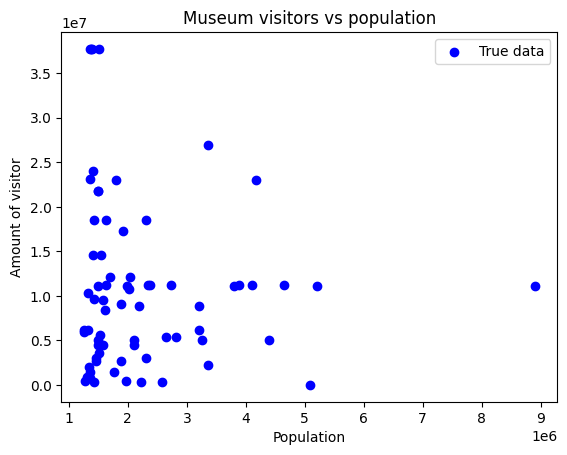

In [5]:
X = merged_df[['visitors in 2023 and 2022']]
y = merged_df['population']
title = 'Museum visitors vs population'
utils.view_data(X,y, title)

### Linear regresion model

Best Parameters: {'copy_X': True, 'fit_intercept': True}
Mean Squared Error on Test Set: 48907563349634.92


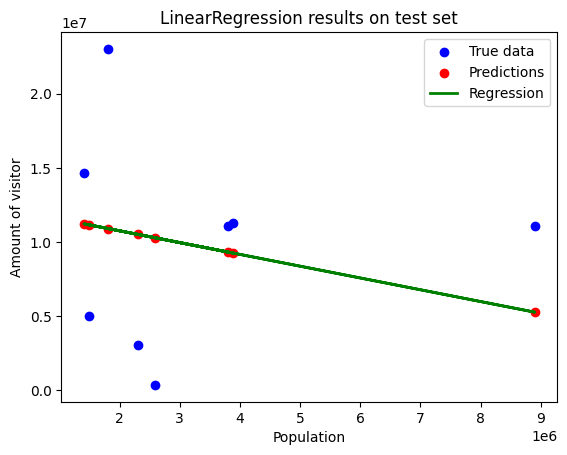

In [6]:
lin_model = utils.linear_regression(X,y)

### Kth nearest neighbor

Best Parameters: {'n_neighbors': 8, 'weights': 'uniform'}
Mean Squared Error on Test Set: 49613086211285.07


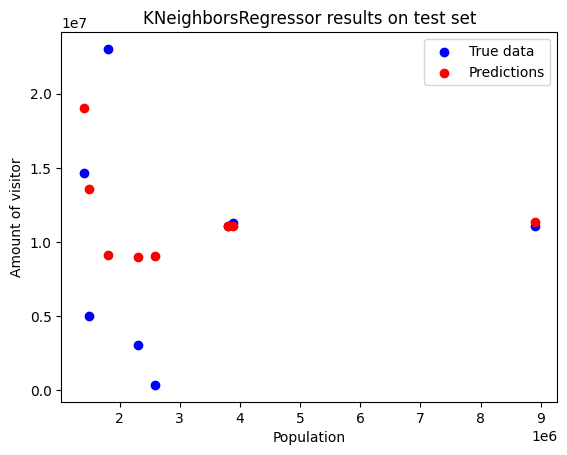

In [7]:
knn_model = utils.knn_regressor(X,y)

### Decision tree

Best Parameters: {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Mean Squared Error on Test Set: 65732811809212.875


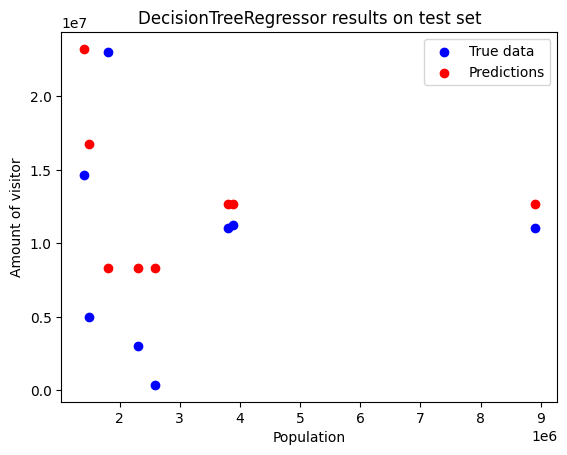

In [8]:
decision_tree_model = utils.decision_tree_regressor(X,y)

We observe the Linear regression model performs best on the test set

## View predictions

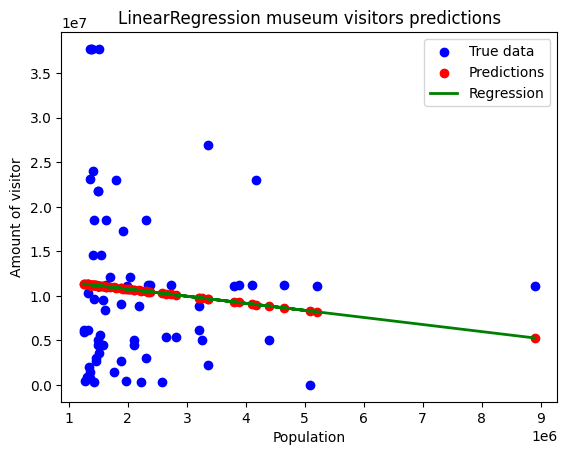

In [9]:
utils.predict_view_model(X, y, lin_model, True)